https://github.com/hmchilders/eds220-hwk-2# Task 2

## General instructions

First, update the following cell to have a link to your Homework 2 GitHub repository

**UPDATE THIS LINK**
https://github.com/hmchilders/eds220-hwk-2

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.


## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County. 

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

## 1

1. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 
2. Under "Donwload Data" click on "Pre-generated Data Files"
3. Click on "Tables of Daily AQI"
4. Copy the URL to the 2017 Daily AQI **by County** zip file `daily_aqi_by_county_2017.zip`
5. In the next code cell read in the data from the URL using the `pd.read_csv` function and store it as `aqi_17`. 
6. In the same cell, read in the data for the 2018 Daily AQI by County zip file and store it as `aqi_18`.

<AxesSubplot:title={'center':'Santa Barbara County Air Quality Index over Time'}, xlabel='Year', ylabel='Air Quality Index'>

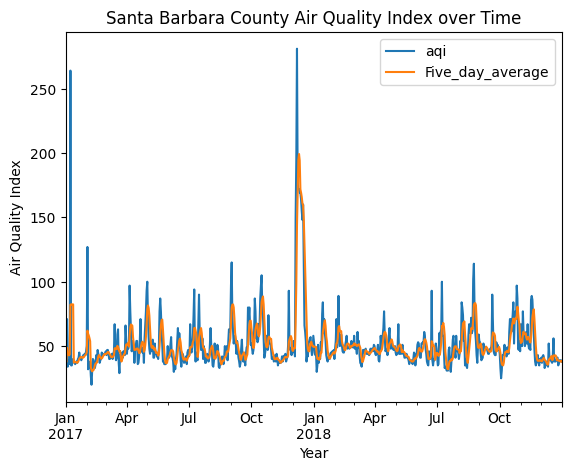

In [67]:
### ===== FINAL CODE =====
#import the data
import pandas as pd

# read in the 2017 data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')

# read in the 2018 data
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')

# head for 2017 dataframe
#head_17 = aqi_17.head()
# head for 2018 dataframe
#head_18 = aqi_18.head()

#info_17 = aqi_17.info()
#info_18 = aqi_18.info()

# Concatenate 2 dataframes
aqi = pd.concat([aqi_17,aqi_18])


# re-assign the column names - .str.lower() makes them lower case
aqi.columns = aqi.columns.str.lower()

#  re-assign the column names again - .str.replace(' ','_') replaces the space for _
aqi.columns = aqi.columns.str.replace(' ','_')

# as a "one liner" you could achieve this column name cleaning like this:
# aqi.columns = aqi.columns.str.lower().str.replace(' ','_')

# Use df.loc to filter to the Santa Barbara rows and columns
aqi_sb = aqi.loc[aqi.county_name == 'Santa Barbara',['date', 'aqi', 'category','defining_parameter', 'defining_site', 'number_of_sites_reporting']]

types = aqi_sb.dtypes

# Overwrite the current date columns and set the dates to a datetime object
aqi_sb.date = pd.to_datetime(aqi_sb.date)

# Use set_index to reset the index 
aqi_sb = aqi_sb.set_index('date')

# access the index
aqi_index = aqi_sb.index

#dtype = datetime64[ns]

# add the 5 Day Average column
aqi_sb.aqi.rolling('5D').mean()
aqi_sb = aqi_sb.assign(Five_day_average = aqi_sb.aqi.rolling('5D').mean())

# plot the data
aqi_sb.plot(use_index = True, 
        y= ['aqi', 'Five_day_average'],
        title='Santa Barbara County Air Quality Index over Time',
        xlabel='Year',
        ylabel='Air Quality Index'
        )

In [ ]:
#import the data
import pandas as pd

In [ ]:
# read in the 2017 data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')

# read in the 2018 data
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')

## 2 
(a) and (b) Use the next two cells to look at the head of both data frames.

(c) Use this cell to make some other preliminary data exploration of your choosing.

In [ ]:
# (a) head for 2017 dataframe
aqi_17.head()

In [ ]:
# (b) head for 2018 dataframe
aqi_18.head()

In [ ]:
# (c) data exploration
aqi_17.info()
aqi_18.info()

## 3
We currently have two separate dataframes. For this exercise we will need to "glue" them one on top of the other. The pandas function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

👀 NOTE: When we concatenate like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the index of `aqi` ends in 327536 while it has 654338 rows.


In [ ]:
# Concatenate 2 dataframes
aqi = pd.concat([aqi_17,aqi_18])

## 4

Run the follwoing cell and read the comments to understand how the column names are being updated.

In [ ]:
# initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# re-assign the column names - .str.lower() makes them lower case
aqi.columns = aqi.columns.str.lower()
print(aqi.columns, '\n')

#  re-assign the column names again - .str.replace(' ','_') replaces the space for _
aqi.columns = aqi.columns.str.replace(' ','_')
print(aqi.columns)

# as a "one liner" you could achieve this column name cleaning like this:
# aqi.columns = aqi.columns.str.lower().str.replace(' ','_')

In [ ]:
#aqi.county_name.unique()

## 5 
In the next cell:
- Select only data from `Santa Barbara` county and store in a new variable `aqi_sb`.
- Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`. 
- Use the `dtypes` attribute to check the data types of the columns. What do you notice for the date column?
The date column is an object so it's not being registered as a date

In [ ]:
# Use df.loc to filter to the Santa Barbara rows and columns
aqi_sb = aqi.loc[aqi.county_name == 'Santa Barbara',['date', 'aqi', 'category','defining_parameter', 'defining_site', 'number_of_sites_reporting']]

aqi_sb.dtypes

## 6
In the next cell:
1. Update the date column of `aqi_sb` to be a datetime object.
2. Update the index of `aqi_sb` to be the date column.

In [ ]:
# Overwrite the current date columns and set the dates to a datetime object
aqi_sb.date = pd.to_datetime(aqi_sb.date)

# Use set_index to reset the index 
aqi_sb = aqi_sb.set_index('date')

## 7
In the next cell, check that you've updated the index by accessing the index of `aqi_sb`  by running `aqi_sb.index`. Add in a comment what is the data type (dtype) of the index.

In [ ]:
# access the index
aqi_sb.index

#dtype = datetime64[ns]

## 8
Run the next cell and read through the comments. They will explain how to calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html).




In [ ]:
# rolling() is a method for pandas.series that provides rolling window calculations
# the parameter '5D' indicates we want the window to be 5 days
# This is a lazy method (think groupby), we need to specify what we want to calculate over each window
# here we add the aggregator function mean()
# this indicates that we want the mean over each window
# and we get a pd.Series as ouput
aqi_sb.aqi.rolling('5D').mean()

## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named 'five_day_average' to the `aqi_sb` dataframe. 

In [ ]:
# add the 5 Day Average column
aqi_sb = aqi_sb.assign(Five_day_average = aqi_sb.aqi.rolling('5D').mean())
aqi_sb.head()

## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Update the title and colors of the graph. Can you see the AQI going up during the Thomas Fire in December 2017?

In [ ]:
# plot the data
aqi_sb.plot(use_index = True, 
        y= ['aqi', 'Five_day_average'],
        title='Santa Barbara County Air Quality Index over Time',
        xlabel='Year',
        ylabel='Air Quality Index'
        )


## 11

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.